In [1]:
import torch

print(torch.cuda.is_available())

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on ', device)
print(f"Device count: {torch.cuda.device_count()}")


True
Running on  cuda:0
Device count: 1


In [2]:
CURRENT_PATH = './NpyDataset/'
#CURRENT_PATH = './'

In [3]:
import numpy as np

# Npy dataset

# train_features = np.load(f'{CURRENT_PATH}data_features_20k.npy')
# train_states = np.load(f'{CURRENT_PATH}data_states_20k.npy')
# train_labels = np.load(f'{CURRENT_PATH}data_labels_20k.npy')

validation_features = np.load(f'{CURRENT_PATH}data_validation_features_5k.npy')
validation_states = np.load(f'{CURRENT_PATH}data_validation_states_5k.npy')
validation_labels = np.load(f'{CURRENT_PATH}data_validation_labels_5k.npy')


In [4]:
# train_features = train_features[:20]
# train_states = train_states[:20]
# train_labels = train_labels[:20]

validation_features = validation_features[:20]
validation_states = validation_states[:20]
validation_labels = validation_labels[:20]

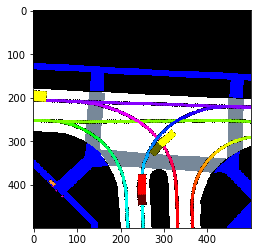

torch.Size([1, 3, 500, 500])
torch.Size([1, 3])


tensor([[ 4.8677, -1.0000, -0.1046]])

In [5]:
import torch
import matplotlib.pyplot as plt

test_sample_img = validation_features[0].reshape((500, 500, 3))

plt.imshow(test_sample_img)
plt.show()

image_tensor = torch.Tensor(test_sample_img).permute(2, 0, 1).unsqueeze(0)
print(image_tensor.size())

test_sample_state = torch.Tensor(np.array([validation_states[0]]))
print(test_sample_state.size())
test_sample_state

In [6]:
from nuscenes.prediction.models.backbone import ResNetBackbone
from nuscenes.prediction.models.covernet import CoverNet

backbone = ResNetBackbone('resnet50')
features = backbone(image_tensor)

print(features.size())
features

c:\users\impor\appdata\local\programs\python\python37\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([1, 2048])


tensor([[1.0366, 0.9643, 1.0634,  ..., 1.0658, 0.9021, 0.9606]],
       grad_fn=<ViewBackward>)

In [7]:
from repVgg.repVggBackbone import RepVGGBackbone

backbone = RepVGGBackbone()
features = backbone(image_tensor)

print(features.size())


RepVGG Block, identity =  None
RepVGG Block, identity =  None
RepVGG Block, identity =  BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  None
RepVGG Block, identity =  BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  None
RepVGG Block, identity =  BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =

In [22]:
#backbone = ResNetBackbone('resnet50')
backbone = RepVGGBackbone()

covernet = CoverNet(backbone, num_modes=64)

logits = covernet(image_tensor, test_sample_state)
print(logits.size())
logits

RepVGG Block, identity =  None
RepVGG Block, identity =  None
RepVGG Block, identity =  BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  None
RepVGG Block, identity =  BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  None
RepVGG Block, identity =  BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =

tensor([[-0.2760, -0.3318,  0.0609, -0.0699,  0.1331, -0.3119,  0.2672,  0.2654,
          0.1054, -0.3191,  0.0168,  0.0147, -0.0273,  0.0948, -0.2672, -0.3708,
          0.0714, -0.3218,  0.1739,  0.1471, -0.0823, -0.3071, -0.3266,  0.3682,
          0.2907, -0.0334,  0.3839,  0.2687, -0.0939, -0.7183,  0.4857,  0.2265,
         -0.2180, -0.4462,  0.1661, -0.1124, -0.6442, -0.5729,  0.0482, -0.2080,
          0.3548, -0.2675,  0.3740, -0.2654,  0.7847, -0.5392, -0.4203,  0.9794,
         -0.3459,  0.0495, -0.4879,  0.6638,  0.2723, -0.1171, -0.2782,  0.2830,
          0.3662, -0.1209, -0.2993, -0.0966, -0.3721, -0.0319,  0.4816,  0.1496]],
       grad_fn=<AddmmBackward>)

In [29]:
from repVgg.repvgg import repvgg_model_convert, create_RepVGG_A0

backbone.backbone = repvgg_model_convert(backbone.backbone, save_path='./repVgg/Models/RepVGG-A0-deploy.pth')



In [30]:
logits = covernet(image_tensor, test_sample_state)
print(logits.size())
logits


torch.Size([1, 64])


tensor([[-2.8368,  0.9006, -0.9400,  0.3095,  0.8534, -1.9345, -0.8011, -0.3374,
         -1.7694,  1.2053,  1.4467, -1.5600,  0.1576,  2.2087, -0.1856, -0.9019,
         -1.1798,  0.6648,  0.3165, -0.0758,  0.7973,  0.1107, -2.7276, -0.1094,
         -1.4129, -0.6053, -1.4773, -0.8769,  2.4721, -0.3531,  0.5796,  1.1273,
          0.2932, -2.7906,  0.2063,  0.8060, -1.8127, -2.7833,  1.2944,  0.7867,
          1.7574,  2.1751,  3.1955, -0.4672, -1.1461, -0.3399, -1.0547,  2.8909,
         -1.1937, -0.5403, -2.3773, -1.2948, -1.2660,  0.3079,  1.2908,  1.3079,
          2.4049,  2.0344, -3.0793,  2.6596,  1.3353,  1.8976,  1.2171, -1.2244]],
       grad_fn=<AddmmBackward>)